#Auto Augmentation_Sample

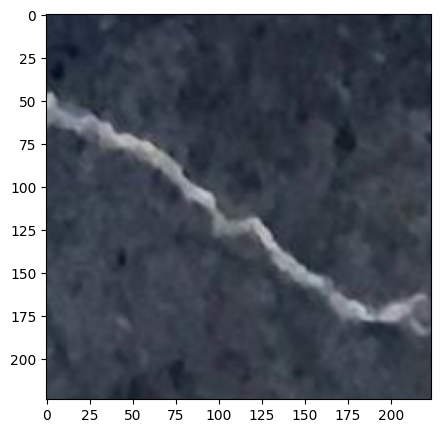

In [2]:
from PIL import Image
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt

class mycustom(Dataset):

    def __init__(self, file_path, labels, transform=None):
        self.file_path = file_path
        self.labels = labels
        self.transform = transform


    def __getitem__(self, index):
        label = self.labels[index]
        file_path = self.file_path[index]

        image = Image.open(file_path)

        if self.transform:
            image = self.transform(image)

        return image, label

torchvision_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.AutoAugment(),
    transforms.ToTensor()
])

train_data_set = mycustom(
    file_path=["/content/00027.jpg"],
    labels=[1],
    transform=torchvision_transform
)

for i in range(100):
    sample, _ = train_data_set[0]

plt.figure(figsize=(5, 5))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()